# Assignment: Image Compression Methods
##### Siddhartha Dutta; A70405217037; BCSE1732
* Image compression is an application of data compression that encodes the original image with few bits. 
* The objective of image compression is to reduce the redundancy of the image and to store or transmit data in an efficient form.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Run Length Encoding
In run-length encoding, the computer replaces each row with numbers that say how many consecutive pixels are the same color, always starting with the number of white pixels. Image compression using run length encoding algorithm is a lossless image compression algorithm i.e. while reconstructing the image from its compressed form, there is no loss of information.

In [2]:
# Taking a Sample Image
image = [[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
         [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
         [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]
image = np.array(image)

In [3]:
# Performing Run Length Encoding Compression
compressedData = list()
compressedSize = 0
for row in image:
    rowFreqs = []
    currBit = 0  # First Bit Has to Be Zero
    count = 0
    for pixel in row:
        if pixel == currBit:
            count += 1
        else:
            rowFreqs.append(count)
            count = 1
            currBit = int(not currBit)
    rowFreqs.append(count)
    compressedSize += len(rowFreqs)
    compressedData.append(rowFreqs)

print('Original Image Size:', image.size)
print('Compressed Data Size:', compressedSize)
print('Compression Ratio:', 1-(compressedSize/image.size))

Original Image Size: 240
Compressed Data Size: 51
Compression Ratio: 0.7875


In [4]:
print('First Row of Original Image:', image[0])
print('First Row of Compressed Data:', compressedData[0])

First Row of Original Image: [0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0]
First Row of Compressed Data: [3, 2, 5, 2, 4]


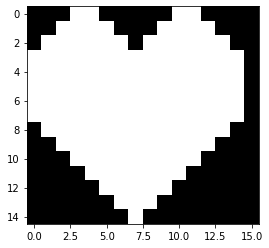

In [5]:
# Decompressing
decompressedImage = []
for row in compressedData:
    rowData = ''
    for i in range(len(row)):
        if i%2 == 0:
            rowData += '0'*row[i]
        else:
            rowData += '1'*row[i]
    decompressedImage.append(list(map(int, list(rowData))))
plt.imshow(decompressedImage, cmap='gray')
plt.show()

## Image Pyramids
There are two kinds of Image Pyramids: 
* Gaussian Pyramid
* Laplacian Pyramids

Higher level (Low resolution) in a Gaussian Pyramid is formed by removing consecutive rows and columns in lower level (higher resolution) image. Then each pixel in higher level is formed by the contribution from 5 pixels in underlying level with gaussian weights. By doing so, a M x N image becomes M/2 x N/2 image. So area reduces to one-fourth of original area. It is called an Octave. The same pattern continues as we go upper in pyramid (ie, resolution decreases). Similarly while expanding, area becomes 4 times in each level.<br>
We can find Gaussian pyramids using *cv2.pyrDown()* and *cv2.pyrUp()* functions.

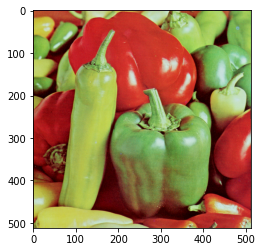

In [6]:
# Loading an Image
image = cv2.imread('Images/peppers.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

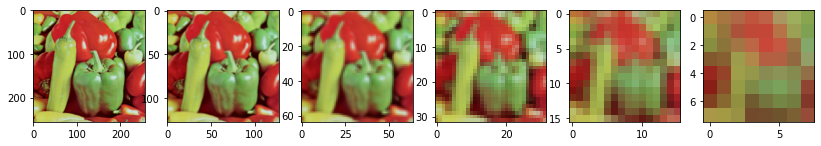

In [7]:
# Generate Gaussian Pyramids for Image
G = image.copy()
gpA = [G]

fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize=(14,4))
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)
    axes[i].imshow(G)
plt.show()

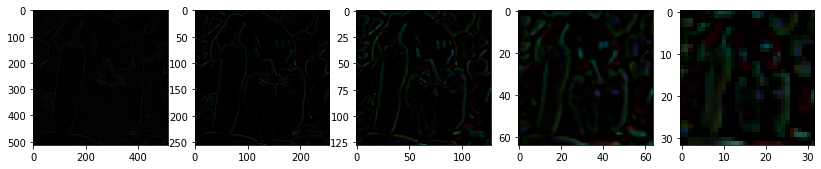

In [8]:
# Generate Laplacian Pyramids for Image
lpA = [gpA[5]]

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize=(14,4))
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
    axes[i-1].imshow(L)
plt.show()

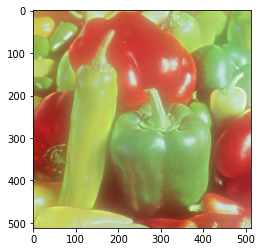

In [9]:
# Reconstructing Image
ls = lpA[0]
for i in range(1,6):
    ls = cv2.pyrUp(ls)
    ls = cv2.add(ls, lpA[i])
    
plt.imshow(ls)
plt.show()